In [2]:
import pandas as pd
import numpy as np

num_cols = 5
cols=["chinese", "reference", "candidate", "score", "label"]
def read_data(filename):
    """
    Function to read data
    """
    df = pd.DataFrame(columns=cols)
    with open(filename, encoding="utf8") as f:
        ctr = 0
        row = {}
        for line in f:
            if line == '\n':
                continue
            if ctr < num_cols:
                row[cols[ctr]] = line.rstrip()
                ctr += 1
            if ctr == num_cols:
                df = df.append(row, ignore_index=True)
                row = {}
                ctr = 0
                
    return df

df = read_data("train.txt")
df

,chinese,reference,candidate,score,label
0,巴林 公主 下 嫁 美 大兵 惊 世 婚姻 五 年 宣告 破裂,"bahraini princess marries us soldier , astonis...",bahraini princess marries a u.s. soldier ; ast...,0.3125,H
1,"巴林 公主 梅 丽 安 ・ 哈 里 发 下 嫁 美国 陆 战 队 大兵 强 生 , 曾 获 ...",the star-crossed marriage between bahraini pri...,u.s. television stations had once feted the ma...,0.6531,H
2,"梅 丽 安 是 海湾 国家 巴林 王室 的 成员 , 强 生 冒 着 赔 上 军旅 生涯 的...",meriam is a member of the gulf country bahrain...,"meri gulf state of bahrain , the royal family ...",0.3784,M
3,"不过 , 据 拉 斯 维 加 斯 评论 报 报导 , 才 过 了 五 年 , 两 人 就 对...",but the las vegas review-journal reported that...,"however , according to the las vegas , comment...",0.3646,M
4,"他们 两 人 在 一九九九年 相遇 , 当时 强 生 还是 职业 军人 , 派 驻 在 巴林 .",the pair met in 1999 when career military man ...,"the two met in 1999 , when johnson was still a...",0.7778,H
...,...,...,...,...,...
579,"新技术 具有 简单 , 方便 , 快捷 的 特点 , 可 就地 在 疫区 进行 检测 , 准...","the new technique is simple , convenient , and...","new technologies with simple , convenient , fa...",0.3705,M
580,"受 中国 疾病 预防 控制 中心 委托 , 汕头 大学 医学院 , 香港 大学 医学院 联合...",upon the invitation of the china disease preve...,commissioned by the chinese center for disease...,0.6944,H
581,外交部 驻 港 特派员 公署 发言人 对 美国国会 众议院 国际 关系 委员会 主席 海德 ...,spokesman for the ministry of foreign affairs ...,the mfa office spokesman told the house intern...,0.3267,M
582,新华社 香港 12 月 3 日 电 外交部 驻 港 特派员 公署 新闻 发言人 3 日 发表...,xinhua news agency report of december 3rd from...,"beijing , december 3 ( xinhua ) -- the mfa off...",0.3858,M


H    312
M    272
Name: label, dtype: int64


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([272., 276., 280., 284., 288., 292., 296., 300., 304., 308., 312.]),
 <BarContainer object of 10 artists>)

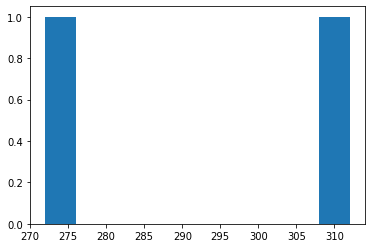

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

label_count = df.label.value_counts()
print(label_count)
plt.hist(label_count)

In [4]:
df.label = pd.get_dummies(df.label).M
df

,chinese,reference,candidate,score,label
0,巴林 公主 下 嫁 美 大兵 惊 世 婚姻 五 年 宣告 破裂,"bahraini princess marries us soldier , astonis...",bahraini princess marries a u.s. soldier ; ast...,0.3125,0
1,"巴林 公主 梅 丽 安 ・ 哈 里 发 下 嫁 美国 陆 战 队 大兵 强 生 , 曾 获 ...",the star-crossed marriage between bahraini pri...,u.s. television stations had once feted the ma...,0.6531,0
2,"梅 丽 安 是 海湾 国家 巴林 王室 的 成员 , 强 生 冒 着 赔 上 军旅 生涯 的...",meriam is a member of the gulf country bahrain...,"meri gulf state of bahrain , the royal family ...",0.3784,1
3,"不过 , 据 拉 斯 维 加 斯 评论 报 报导 , 才 过 了 五 年 , 两 人 就 对...",but the las vegas review-journal reported that...,"however , according to the las vegas , comment...",0.3646,1
4,"他们 两 人 在 一九九九年 相遇 , 当时 强 生 还是 职业 军人 , 派 驻 在 巴林 .",the pair met in 1999 when career military man ...,"the two met in 1999 , when johnson was still a...",0.7778,0
...,...,...,...,...,...
579,"新技术 具有 简单 , 方便 , 快捷 的 特点 , 可 就地 在 疫区 进行 检测 , 准...","the new technique is simple , convenient , and...","new technologies with simple , convenient , fa...",0.3705,1
580,"受 中国 疾病 预防 控制 中心 委托 , 汕头 大学 医学院 , 香港 大学 医学院 联合...",upon the invitation of the china disease preve...,commissioned by the chinese center for disease...,0.6944,0
581,外交部 驻 港 特派员 公署 发言人 对 美国国会 众议院 国际 关系 委员会 主席 海德 ...,spokesman for the ministry of foreign affairs ...,the mfa office spokesman told the house intern...,0.3267,1
582,新华社 香港 12 月 3 日 电 外交部 驻 港 特派员 公署 新闻 发言人 3 日 发表...,xinhua news agency report of december 3rd from...,"beijing , december 3 ( xinhua ) -- the mfa off...",0.3858,1


In [5]:
import pyter

df['ter_score'] = df.apply(lambda x: pyter.ter(x.reference.split(), x.candidate.split()), axis=1)
df

,chinese,reference,candidate,score,label,ter_score
0,巴林 公主 下 嫁 美 大兵 惊 世 婚姻 五 年 宣告 破裂,"bahraini princess marries us soldier , astonis...",bahraini princess marries a u.s. soldier ; ast...,0.3125,0,0.769231
1,"巴林 公主 梅 丽 安 ・ 哈 里 发 下 嫁 美国 陆 战 队 大兵 强 生 , 曾 获 ...",the star-crossed marriage between bahraini pri...,u.s. television stations had once feted the ma...,0.6531,0,0.558140
2,"梅 丽 安 是 海湾 国家 巴林 王室 的 成员 , 强 生 冒 着 赔 上 军旅 生涯 的...",meriam is a member of the gulf country bahrain...,"meri gulf state of bahrain , the royal family ...",0.3784,1,0.810811
3,"不过 , 据 拉 斯 维 加 斯 评论 报 报导 , 才 过 了 五 年 , 两 人 就 对...",but the las vegas review-journal reported that...,"however , according to the las vegas , comment...",0.3646,1,0.909091
4,"他们 两 人 在 一九九九年 相遇 , 当时 强 生 还是 职业 军人 , 派 驻 在 巴林 .",the pair met in 1999 when career military man ...,"the two met in 1999 , when johnson was still a...",0.7778,0,0.388889
...,...,...,...,...,...,...
579,"新技术 具有 简单 , 方便 , 快捷 的 特点 , 可 就地 在 疫区 进行 检测 , 准...","the new technique is simple , convenient , and...","new technologies with simple , convenient , fa...",0.3705,1,0.826087
580,"受 中国 疾病 预防 控制 中心 委托 , 汕头 大学 医学院 , 香港 大学 医学院 联合...",upon the invitation of the china disease preve...,commissioned by the chinese center for disease...,0.6944,0,0.597222
581,外交部 驻 港 特派员 公署 发言人 对 美国国会 众议院 国际 关系 委员会 主席 海德 ...,spokesman for the ministry of foreign affairs ...,the mfa office spokesman told the house intern...,0.3267,1,1.352941
582,新华社 香港 12 月 3 日 电 外交部 驻 港 特派员 公署 新闻 发言人 3 日 发表...,xinhua news agency report of december 3rd from...,"beijing , december 3 ( xinhua ) -- the mfa off...",0.3858,1,1.162162


In [6]:
# writing dataframe to csv
df[['reference', 'candidate', 'score', 'ter_score', 'label']].to_csv('train.csv', index=False)

In [7]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df[['reference', 'candidate', 'score', 'ter_score', 'label']], test_size=0.2)
train.to_csv('train_split.csv', index=False)
validation.to_csv('validation_split.csv', index=False)

In [8]:
test_df = read_data('test.txt')
test_df.label = pd.get_dummies(test_df.label).M
test_df['ter_score'] = df.apply(lambda x: pyter.ter(x.reference.split(), x.candidate.split()), axis=1)
test_df[['reference', 'candidate', 'score', 'ter_score', 'label']].to_csv('test.csv', index=False)

In [1]:
import torch
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, vocab_size, embed_size=300):
        super(NeuralNet, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_size)
#         self.fc1 = nn.Linear((2*embed_size)+1, 100)
        self.fc1 = nn.Linear(embed_size+2, 100)
#         self.fc2 = nn.Linear(100, 100)
        self.drop = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(100, 2)
        
    def forward(self, reference, candidate, score, ter_score):
        ref_emb = self.embedding(reference)
        cand_emb = self.embedding(candidate)
#         inp = torch.cat((ref_emb, cand_emb), dim=1)
        diff = ref_emb - cand_emb
        inp = torch.cat((diff, score.view(-1,1), ter_score.view(-1, 1)), dim=1)
        
        out = self.fc1(inp)
        dropped = self.drop(out)
        
        model_out = self.fc2(dropped)
        return model_out

In [2]:
import spacy
spacy_en = spacy.load('en_core_web_sm')
def tokenize_en(sentence):
    return [tok.text for tok in spacy_en.tokenizer(sentence)]

In [4]:
from torchtext.data import Field, TabularDataset, BucketIterator

# fields
label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.long)
float_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(tokenize=tokenize_en, lower=True, batch_first=True)
fields = [('reference', text_field), ('candidate', text_field), 
          ('score', float_field), ('ter_score', float_field), 
          ('label', label_field)]

# tabular dataset
train, validation, test = TabularDataset.splits(path='/Users/saileshpatnala/projects/machine_translation_classification', 
                                          train='train_split.csv', 
                                          validation='validation_split.csv',
                                          test='test.csv',
                                          format='CSV', fields=fields, skip_header=True)

# iterators
train_iter = BucketIterator(train, batch_size=32)
val_iter = BucketIterator(validation, batch_size=32)
test_iter = BucketIterator(test, batch_size=32)

In [5]:
# build vocabulary
text_field.build_vocab(train)
len(text_field.vocab)

3703

In [35]:
import torch.optim as optim

num_epochs=10
model = NeuralNet(vocab_size=len(text_field.vocab))
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
eval_every = len(train_iter) // 2
best_val_loss = float("inf")

# initialize running values
running_loss = 0.0
val_running_loss = 0.0
train_acc = 0.0
global_step = 0
train_loss_list = []
val_loss_list = []
global_steps_list = []

for epoch in range(num_epochs):
    for (reference, candidate, score, ter_score, label), _ in train_iter:
        out = model(reference, candidate, score, ter_score)
        loss = loss_fn(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
#         train_acc = (out.argmax(1) == label).sum().item()

        # update running values
        running_loss += loss.item()
        global_step += 1

        # evaluation step
        if global_step % eval_every:
            model.eval()
            with torch.no_grad():
                # validation loop
                for (reference, candidate, score, ter_score, label), _ in val_iter:
                    out = model(reference, candidate, score, ter_score)
                    loss = loss_fn(out, label)
                    val_running_loss += loss.item()

            # evaluation
            average_train_loss = running_loss / eval_every
            average_val_loss = val_running_loss / len(val_iter)
            train_loss_list.append(average_train_loss)
            val_loss_list.append(average_val_loss)
            global_steps_list.append(global_step)

            # resetting running values
            running_loss = 0.0
            val_running_loss = 0.0
            model.train()

            # log training
            print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Validation Loss: {:.4f}'
                  .format(epoch+1, num_epochs, global_step, num_epochs*len(train_iter), 
                          average_train_loss, average_val_loss))
            
            if average_val_loss < best_val_loss:
                best_val_loss = average_val_loss
                torch.save(model.state_dict(), 'model.pt')

/Users/saileshpatnala/projects/machine_translation_classification/venv/lib/python3.8/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


Epoch [1/10], Step [1/150], Train Loss: 0.0989, Validation Loss: 0.6285
Epoch [1/10], Step [2/150], Train Loss: 0.0900, Validation Loss: 0.6319
Epoch [1/10], Step [3/150], Train Loss: 0.1024, Validation Loss: 0.7167
Epoch [1/10], Step [4/150], Train Loss: 0.1398, Validation Loss: 0.6357
Epoch [1/10], Step [5/150], Train Loss: 0.1054, Validation Loss: 0.7744
Epoch [1/10], Step [6/150], Train Loss: 0.1086, Validation Loss: 0.8471
Epoch [1/10], Step [8/150], Train Loss: 0.2132, Validation Loss: 0.6804
Epoch [1/10], Step [9/150], Train Loss: 0.0949, Validation Loss: 0.6092
Epoch [1/10], Step [10/150], Train Loss: 0.0899, Validation Loss: 0.5759
Epoch [1/10], Step [11/150], Train Loss: 0.0880, Validation Loss: 0.6120
Epoch [1/10], Step [12/150], Train Loss: 0.1019, Validation Loss: 0.6182
Epoch [1/10], Step [13/150], Train Loss: 0.1267, Validation Loss: 0.5846
Epoch [1/10], Step [15/150], Train Loss: 0.1770, Validation Loss: 0.6018
Epoch [2/10], Step [16/150], Train Loss: 0.0666, Validation

Epoch [10/10], Step [141/150], Train Loss: 0.0017, Validation Loss: 0.9595
Epoch [10/10], Step [142/150], Train Loss: 0.0005, Validation Loss: 1.1966
Epoch [10/10], Step [143/150], Train Loss: 0.0000, Validation Loss: 1.1982
Epoch [10/10], Step [144/150], Train Loss: 0.0190, Validation Loss: 1.1516
Epoch [10/10], Step [145/150], Train Loss: 0.0346, Validation Loss: 1.1971
Epoch [10/10], Step [146/150], Train Loss: 0.0008, Validation Loss: 0.9014
Epoch [10/10], Step [148/150], Train Loss: 0.0011, Validation Loss: 0.8332
Epoch [10/10], Step [149/150], Train Loss: 0.0005, Validation Loss: 0.8051
Epoch [10/10], Step [150/150], Train Loss: 0.0001, Validation Loss: 0.7745


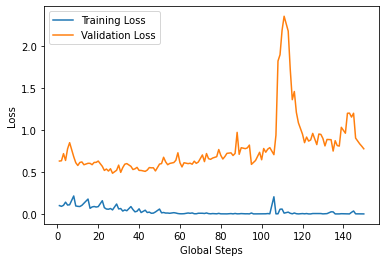

In [36]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(global_steps_list, train_loss_list, label='Training Loss')
plt.plot(global_steps_list, val_loss_list, label='Validation Loss')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0     0.7683    0.6848    0.7241        92
           1     0.6848    0.7683    0.7241        82

    accuracy                         0.7241       174
   macro avg     0.7265    0.7265    0.7241       174
weighted avg     0.7289    0.7241    0.7241       174



/Users/saileshpatnala/projects/machine_translation_classification/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

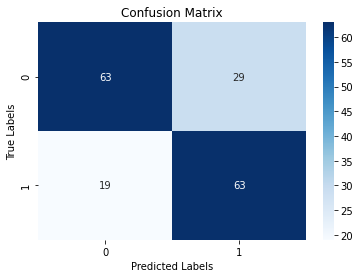

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# evaluate the model
y_true = []
y_pred = []
threshold = 0.5

model = NeuralNet(vocab_size=len(text_field.vocab))
model.load_state_dict(torch.load('model.pt'))

model.eval()
with torch.no_grad():
    for (reference, candidate, score, ter_score, label), _ in test_iter:
        out = model(reference, candidate, score, ter_score)
        y_pred.extend(out.argmax(1))
        y_true.extend(label)
        
print('Classification Report:')
print(classification_report(y_true, y_pred, labels=np.unique(y_true), digits=4))

cm = confusion_matrix(y_true, y_pred, np.unique(y_true))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

ax.set_title('Confusion Matrix')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

ax.xaxis.set_ticklabels(np.unique(y_true))
ax.yaxis.set_ticklabels(np.unique(y_pred))      